# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json as json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


url = "http://api.openweathermap.org/data/2.5/weather?appid=0d08497097f09f114eca47bcedc7e857&q=Chicago&units=Imperial"

#query_url = f"{base_url}appid={weather_api_key}&q="Chicago"&units={units}"
response = requests.get(url).json()    
print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
country = []
lat = []
lon = []
temp = []
temp_max = []
humid = []
cover = []
wind = []
found = []


for i in range(len(cities)):
        print(f"Processing request: {i} for city: {cities[i]}")
        query_url = f"{base_url}appid={weather_api_key}&q={cities[i]}&units={units}"
        try:
            response = requests.get(query_url).json()          
        except KeyError:
            #high level key failure
            print(f"No data returned for city: {cities[i]}")
        except:
            #some rando failure
            print(f"No data returned for city: {cities[i]}") 
        else:
            try:
                country.append(response['sys']['country'])
                lat.append(response['coord']['lat'])
                lon.append(response['coord']['lon'])
                temp.append(response['main']['temp'])
                temp_max.append(response['main']['temp_max'])
                humid.append(response['main']['humidity'])
                cover.append(response['clouds']['all'])
                wind.append(response['wind']['speed'])
                found.append({cities[i]})
                print(f"Data for {cities[i]} saved.")
            except KeyError:
                print(f"No data returned for city: {cities[i]}")


Processing request: 0 for city: makakilo city
Data for makakilo city saved.
Processing request: 1 for city: avarua
Data for avarua saved.
Processing request: 2 for city: belushya guba
No data returned for city: belushya guba
Processing request: 3 for city: shushtar
Data for shushtar saved.
Processing request: 4 for city: laguna
Data for laguna saved.
Processing request: 5 for city: harper
Data for harper saved.
Processing request: 6 for city: svetlyy
Data for svetlyy saved.
Processing request: 7 for city: shirokiy
Data for shirokiy saved.
Processing request: 8 for city: jinchang
Data for jinchang saved.
Processing request: 9 for city: hermanus
Data for hermanus saved.
Processing request: 10 for city: punta arenas
Data for punta arenas saved.
Processing request: 11 for city: vaitupu
No data returned for city: vaitupu
Processing request: 12 for city: namibe
Data for namibe saved.
Processing request: 13 for city: ukiah
Data for ukiah saved.
Processing request: 14 for city: attawapiskat
No

Data for cabo san lucas saved.
Processing request: 119 for city: los llanos de aridane
Data for los llanos de aridane saved.
Processing request: 120 for city: kruisfontein
Data for kruisfontein saved.
Processing request: 121 for city: wembley
Data for wembley saved.
Processing request: 122 for city: nuuk
Data for nuuk saved.
Processing request: 123 for city: ferme-neuve
Data for ferme-neuve saved.
Processing request: 124 for city: guiratinga
Data for guiratinga saved.
Processing request: 125 for city: sentyabrskiy
No data returned for city: sentyabrskiy
Processing request: 126 for city: portland
Data for portland saved.
Processing request: 127 for city: dzhebariki-khaya
Data for dzhebariki-khaya saved.
Processing request: 128 for city: bambous virieux
Data for bambous virieux saved.
Processing request: 129 for city: pinawa
Data for pinawa saved.
Processing request: 130 for city: sao joao del rei
Data for sao joao del rei saved.
Processing request: 131 for city: sarakhs
Data for sarakhs

Data for dhar saved.
Processing request: 234 for city: mys shmidta
No data returned for city: mys shmidta
Processing request: 235 for city: atar
Data for atar saved.
Processing request: 236 for city: xingyi
Data for xingyi saved.
Processing request: 237 for city: mossendjo
Data for mossendjo saved.
Processing request: 238 for city: nouadhibou
Data for nouadhibou saved.
Processing request: 239 for city: zhezkazgan
Data for zhezkazgan saved.
Processing request: 240 for city: kallithea
Data for kallithea saved.
Processing request: 241 for city: hambantota
Data for hambantota saved.
Processing request: 242 for city: san policarpo
Data for san policarpo saved.
Processing request: 243 for city: aflu
No data returned for city: aflu
Processing request: 244 for city: bachaquero
Data for bachaquero saved.
Processing request: 245 for city: arraial do cabo
Data for arraial do cabo saved.
Processing request: 246 for city: bulgan
Data for bulgan saved.
Processing request: 247 for city: formoso do ar

Data for churapcha saved.
Processing request: 352 for city: peniche
Data for peniche saved.
Processing request: 353 for city: purpe
Data for purpe saved.
Processing request: 354 for city: hasaki
Data for hasaki saved.
Processing request: 355 for city: zhengjiatun
Data for zhengjiatun saved.
Processing request: 356 for city: gweru
Data for gweru saved.
Processing request: 357 for city: coihaique
Data for coihaique saved.
Processing request: 358 for city: pemangkat
Data for pemangkat saved.
Processing request: 359 for city: vryburg
Data for vryburg saved.
Processing request: 360 for city: norman wells
Data for norman wells saved.
Processing request: 361 for city: santiago
Data for santiago saved.
Processing request: 362 for city: takoradi
Data for takoradi saved.
Processing request: 363 for city: maimon
No data returned for city: maimon
Processing request: 364 for city: northam
Data for northam saved.
Processing request: 365 for city: taiyuan
Data for taiyuan saved.
Processing request: 3

Data for stornoway saved.
Processing request: 473 for city: springdale
Data for springdale saved.
Processing request: 474 for city: sioux lookout
Data for sioux lookout saved.
Processing request: 475 for city: emba
Data for emba saved.
Processing request: 476 for city: nome
Data for nome saved.
Processing request: 477 for city: tezu
Data for tezu saved.
Processing request: 478 for city: bonthe
Data for bonthe saved.
Processing request: 479 for city: lokken verk
No data returned for city: lokken verk
Processing request: 480 for city: maceio
Data for maceio saved.
Processing request: 481 for city: hun
Data for hun saved.
Processing request: 482 for city: mocambique
No data returned for city: mocambique
Processing request: 483 for city: ivangorod
Data for ivangorod saved.
Processing request: 484 for city: plettenberg bay
Data for plettenberg bay saved.
Processing request: 485 for city: lucea
Data for lucea saved.
Processing request: 486 for city: hihifo
No data returned for city: hihifo
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, lon, temp, humid, cover and wind
weather_dict = {
    "country":country,
    "city": found,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "max_temp": temp_max,
    "humid": humid,
    "cover": cover,
    "wind": wind}    

cities_df = pd.DataFrame(weather_dict)
# save the API data to file
cities_df.to_csv("output_data/cities.csv", index=False, header=True)

In [5]:
#cities_df.at[3, 'humid'] = 101
cities_df.head()

,country,city,lat,lon,temp,max_temp,humid,cover,wind
0,US,{makakilo city},21.3469,-158.0858,80.67,81.28,74,83,8.48
1,CK,{avarua},-21.2078,-159.7750,71.65,71.65,94,75,8.05
2,IR,{shushtar},32.0455,48.8567,101.05,101.05,10,0,3.11
3,US,{laguna},38.4210,-121.4238,93.88,104.22,29,1,1.01
4,LR,{harper},4.3750,-7.7169,78.21,78.21,78,76,11.54


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.count()

country     532
city        532
lat         532
lon         532
temp        532
max_temp    532
humid       532
cover       532
wind        532
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = cities_df.index
too_humid = cities_df["humid"] > 100
too_humid_index = index[too_humid]
too_humid_list = too_humid_index.tolist()
print(too_humid_list)

[]


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cool_cities_df = cities_df.drop(too_humid_index, inplace=False)

In [9]:
cool_cities_df.count()

country     532
city        532
lat         532
lon         532
temp        532
max_temp    532
humid       532
cover       532
wind        532
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

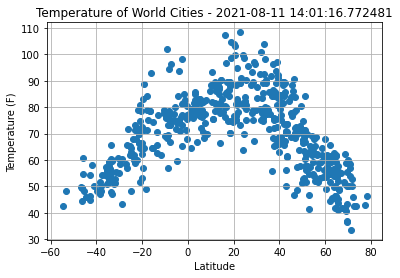

In [10]:
# Current date time in local system
current_dt = datetime.now()

plt.scatter(cool_cities_df["lat"], cool_cities_df["temp"], marker="o")

# titles, etc.
title = f"Temperature of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperatureofWorldCities.png")

# Show plot
plt.show()

The chart above indicates that temperatures rise as location nears the equator, but that there are more high temperatures recorded in northern latitudes, possibly due the greater inhabitable landmass in the northern hemisphere and therefore higher number of cities for which data is available.

## Latitude vs. Humidity Plot

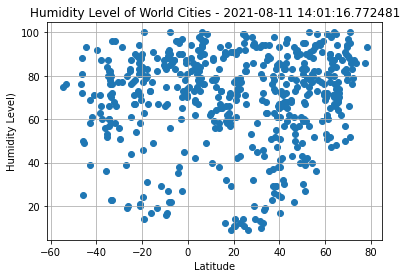

In [11]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["humid"], marker="o")

# titles, etc.
title = f"Humidity Level of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Humidity Level)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityofWorldCities.png")

# Show plot
plt.show()

From the chart above I would expect that lower humidity locations tend to be approximately 20 degrees above and below the equator.

## Latitude vs. Cloudiness Plot

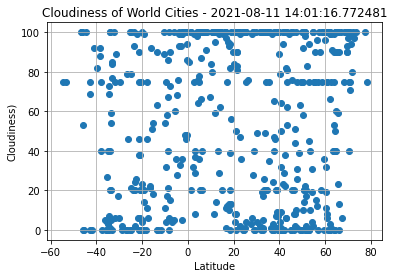

In [12]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["cover"], marker="o")

# titles, etc.
title = f"Cloudiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Cloudiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessofWorldCities.png")

# Show plot
plt.show()

The chart above seems to indicate that cloudiness is less an attribute of latitude and is probably dependent on another factor, such as coastal areas of landmasses.

## Latitude vs. Wind Speed Plot

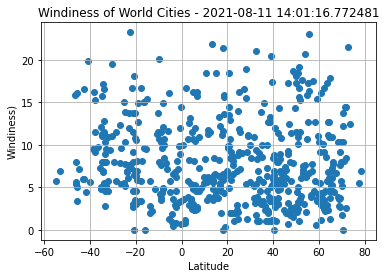

In [13]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["wind"], marker="o")

# titles, etc.
plt.title("Windiness of World Cities")
title = f"Windiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Windiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessofWorldCities.png")

# Show plot
plt.show()

The chart above seems to indicate that windiness is less an attribute of latitude and is probably dependent on another factor, such as coastal areas of landmasses.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between latitude and temperature is -0.69
The r-squared is: 0.47931477456531857


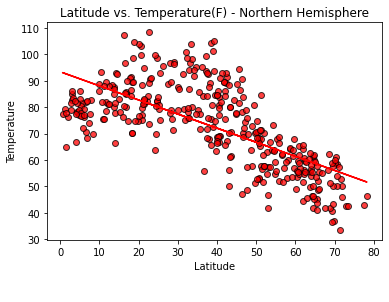

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and max temp for the Cities in the northern hemispere
# first split into northern and southern latitudes
north_lat = cities_df.loc[(cities_df["lat"] >= 0)]["lat"]
south_lat = cities_df.loc[(cities_df["lat"] < 0)]["lat"]

north_temp =  cities_df.loc[(cities_df["lat"] >= 0)]["max_temp"]

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(north_lat,north_temp)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Temperature(F) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(north_lat,north_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of -0.69 it is likely that temperature is affected by latitude in the northern hemisphere, with temperatures trending downwards the further a city is from the equator.  The R2 value just below .5 tells us there are other factors that significantly effect temperatures, perhaps elevation, or the presence of Maserati dealerships.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between latitude and temperature is 0.78
The r-squared is: 0.6047729215676838


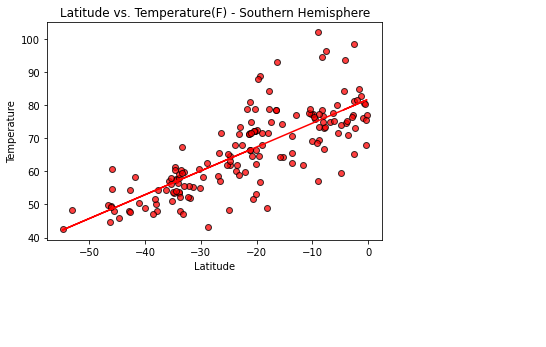

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and max temp for the Cities in the southern hemispere

south_temp =  cities_df.loc[(cities_df["lat"] < 0)]["max_temp"]

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(south_lat,south_temp)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Temperature(F) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(south_lat,south_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.78 it is very likely that temperature is affected by latitude in the southern hemisphere, with temperatures trending downwards the further a city is from the equator.  The R2 value of around .6 tells us distance from the equator is probably a significant factor.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and humidity is 0.08
The r-squared is: 0.006771150853225146


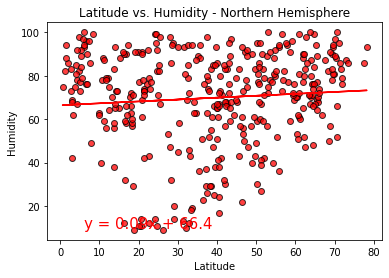

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and humidity for the Cities in the northern hemispere

north_humid =  cities_df.loc[(cities_df["lat"] >= 0)]["humid"]

print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(north_lat,north_humid)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(north_lat,north_humid, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.08 and R2 less than 0.007 there doesn't seem to be a connection between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and humidity is 0.07
The r-squared is: 0.005284838968558889


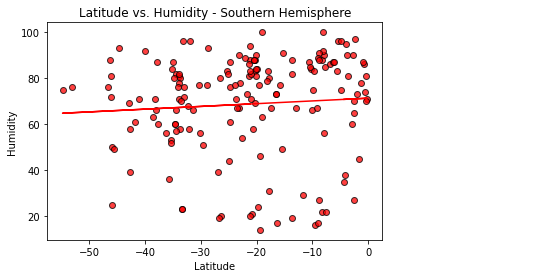

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and humidity for the Cities in the southern hemispere

south_humid =  cities_df.loc[(cities_df["lat"] < 0)]["humid"]

print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(south_lat,south_humid)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(south_lat,south_humid, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.07 and R2 barely above 0.005 there doesn't seem to be a connection between humidity and latitude in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and cloudiness is -0.05
The r-squared is: 0.0029446982818982694


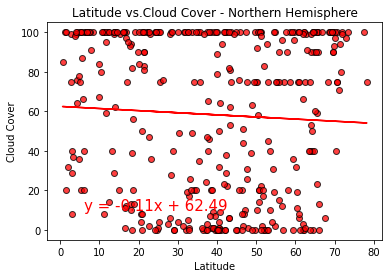

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and cloud cover for the Cities in the northern hemisphere

north_cover =  cities_df.loc[(cities_df["lat"] >= 0)]["cover"]

print(f"The correlation coefficient between latitude and cloudiness is {round(st.pearsonr(north_lat,north_cover)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_cover)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs.Cloud Cover - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.scatter(north_lat,north_cover, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of -0.05 and R2 of 0.002 there doesn't seem to be a connection between cloud cover and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and cloudiness is 0.07
The r-squared is: 0.005070364042276405


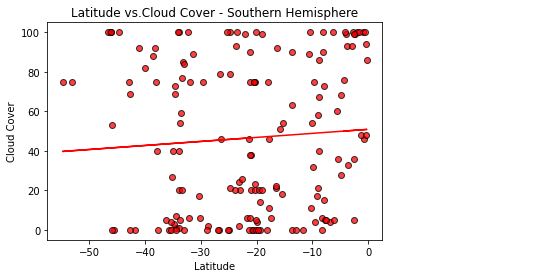

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and cloud cover for the Cities in the southern hemisphere

south_cover =  cities_df.loc[(cities_df["lat"] < 0)]["cover"]

print(f"The correlation coefficient between latitude and cloudiness is {round(st.pearsonr(south_lat,south_cover)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_cover)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs.Cloud Cover - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.scatter(south_lat,south_cover, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.07 and R2 of 0.005 there doesn't seem to be a connection between cloud cover and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between latitude and wind speed is 0.01
The r-squared is: 3.4102182676222456e-05


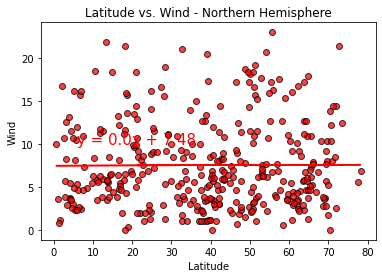

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and wind speed for the Cities

north_wind =  cities_df.loc[(cities_df["lat"] >= 0)]["wind"]

print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(north_lat,north_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Wind - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(north_lat,north_wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of .01 and R2 .0000341, there is likely no relation between wind and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between latitude and wind speed is -0.19
The r-squared is: 0.03611838142191561


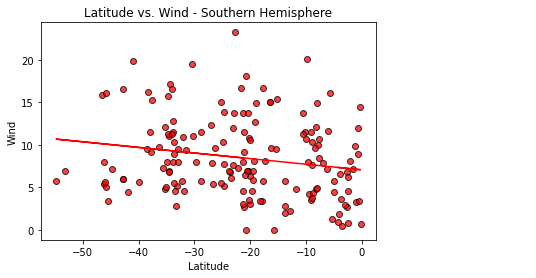

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and wind speed for the Cities in the southern hemsphere

south_wind =  cities_df.loc[(cities_df["lat"] < 0)]["wind"]

print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(south_lat,south_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Wind - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(south_lat,south_wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of -0.19 and R2 .036, there is likely no relation between wind and latitude in the southern hemisphere.